In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Load the complete dataset

In [4]:
df = pd.read_csv('../data/wind_turbine_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total samples: {len(df)}")
print("\nFirst few rows:")
df.head()

/tmp/ipykernel_540475/2633291500.py:1: DtypeWarning: Columns (3,4,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/wind_turbine_data.csv')


Dataset shape: (10038960, 34)
Total samples: 10038960

First few rows:


,pluswind_eia_id,index_right,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,p_cap,t_manu,t_model,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_retrofit,t_retro_yr,t_offshore,t_conf_atr,t_conf_loc,t_img_date,t_img_src,xlong,ylat,proximity,timestamp,wind_speed,capacity_factor
0,692,40695,3072710,56-000352,2012-WTW-9965-OE,46872.0,692.0,WY,Carbon County,56007.0,Medicine Bow,2015.0,5,3.55,Vestas,V47-0.71,710.0,50.0,47.0,1734.94,73.5,1,2015.0,0,2,3,2/8/2017,Maxar,-106.242531,41.834377,0.00064,1970-01-01 00:00:02.021010100,4.494357,0.037305
1,692,40695,3072710,56-000352,2012-WTW-9965-OE,46872.0,692.0,WY,Carbon County,56007.0,Medicine Bow,2015.0,5,3.55,Vestas,V47-0.71,710.0,50.0,47.0,1734.94,73.5,1,2015.0,0,2,3,2/8/2017,Maxar,-106.242531,41.834377,0.00064,1970-01-01 00:00:02.021010101,3.999885,0.022118
2,692,40695,3072710,56-000352,2012-WTW-9965-OE,46872.0,692.0,WY,Carbon County,56007.0,Medicine Bow,2015.0,5,3.55,Vestas,V47-0.71,710.0,50.0,47.0,1734.94,73.5,1,2015.0,0,2,3,2/8/2017,Maxar,-106.242531,41.834377,0.00064,1970-01-01 00:00:02.021010102,3.370606,0.008393
3,692,40695,3072710,56-000352,2012-WTW-9965-OE,46872.0,692.0,WY,Carbon County,56007.0,Medicine Bow,2015.0,5,3.55,Vestas,V47-0.71,710.0,50.0,47.0,1734.94,73.5,1,2015.0,0,2,3,2/8/2017,Maxar,-106.242531,41.834377,0.00064,1970-01-01 00:00:02.021010103,2.950713,0.000000
4,692,40695,3072710,56-000352,2012-WTW-9965-OE,46872.0,692.0,WY,Carbon County,56007.0,Medicine Bow,2015.0,5,3.55,Vestas,V47-0.71,710.0,50.0,47.0,1734.94,73.5,1,2015.0,0,2,3,2/8/2017,Maxar,-106.242531,41.834377,0.00064,1970-01-01 00:00:02.021010104,2.826565,0.000000


In [5]:
print("Data Info:")
df.info()

print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())

print("\n" + "="*50)
print("Basic Statistics:")
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10038960 entries, 0 to 10038959
Data columns (total 34 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pluswind_eia_id  int64  
 1   index_right      int64  
 2   case_id          int64  
 3   faa_ors          object 
 4   faa_asn          object 
 5   usgs_pr_id       float64
 6   eia_id           float64
 7   t_state          object 
 8   t_county         object 
 9   t_fips           float64
 10  p_name           object 
 11  p_year           float64
 12  p_tnum           int64  
 13  p_cap            float64
 14  t_manu           object 
 15  t_model          object 
 16  t_cap            float64
 17  t_hh             float64
 18  t_rd             float64
 19  t_rsa            float64
 20  t_ttlh           float64
 21  t_retrofit       int64  
 22  t_retro_yr       float64
 23  t_offshore       int64  
 24  t_conf_atr       int64  
 25  t_conf_loc       int64  
 26  t_img_date       object 
 27 

,pluswind_eia_id,index_right,case_id,usgs_pr_id,eia_id,t_fips,p_year,p_tnum,p_cap,t_cap,t_hh,t_rd,t_rsa,t_ttlh,t_retrofit,t_retro_yr,t_offshore,t_conf_atr,t_conf_loc,xlong,ylat,proximity,wind_speed,capacity_factor
count,1.003896e+07,1.003896e+07,1.003896e+07,6.298440e+06,9.811200e+06,1.003896e+07,1.002144e+07,1.003896e+07,9.986400e+06,9.942600e+06,9.890040e+06,9.898800e+06,9.898800e+06,9.890040e+06,1.003896e+07,937320.000000,1.003896e+07,1.003896e+07,1.003896e+07,1.003896e+07,1.003896e+07,1.003896e+07,1.003896e+07,1.003896e+07
mean,5.722221e+04,3.695069e+04,3.057539e+06,2.836579e+04,5.735835e+04,3.111237e+04,2.011628e+03,5.238569e+01,9.767021e+01,1.975991e+03,8.062170e+01,9.410301e+01,7.331946e+03,1.276829e+02,9.336824e-02,2019.813084,8.726003e-04,2.925829e+00,2.996510e+00,-9.804403e+01,3.998249e+01,3.665000e-03,6.516836e+00,3.104134e-01
std,7.405635e+03,2.192803e+04,3.307473e+04,1.222501e+04,7.553925e+03,1.450038e+04,5.926643e+00,5.680319e+01,8.959816e+01,7.141919e+02,1.041920e+01,2.191260e+01,3.225335e+03,1.996387e+01,2.909478e-01,1.697337,2.952692e-02,3.022537e-01,8.347826e-02,1.273221e+01,4.876928e+00,3.177255e-03,3.169516e+00,3.243614e-01
min,6.920000e+02,6.300000e+01,3.000245e+06,1.370000e+02,6.920000e+02,4.003000e+03,1.982000e+03,1.000000e+00,4.550000e-01,6.500000e+01,2.280000e+01,1.650000e+01,2.138200e+02,3.110000e+01,0.000000e+00,2015.000000,0.000000e+00,1.000000e+00,1.000000e+00,-1.240647e+02,2.611290e+01,7.810250e-06,2.697884e-03,0.000000e+00
25%,5.665000e+04,1.814800e+04,3.032166e+06,2.126100e+04,5.669975e+04,1.912100e+04,2.008000e+03,1.100000e+01,1.980000e+01,1.500000e+03,8.000000e+01,8.200000e+01,5.281020e+03,1.210000e+02,0.000000e+00,2019.000000,0.000000e+00,3.000000e+00,3.000000e+00,-1.030570e+02,3.582662e+01,1.197907e-03,4.145760e+00,4.261352e-02
50%,5.759150e+04,3.756450e+04,3.048889e+06,2.898300e+04,5.762450e+04,2.960500e+04,2.012000e+03,4.100000e+01,8.000000e+01,2.000000e+03,8.000000e+01,9.100000e+01,6.503880e+03,1.262000e+02,0.000000e+00,2020.000000,0.000000e+00,3.000000e+00,3.000000e+00,-9.795934e+01,4.128891e+01,2.894482e-03,6.282711e+00,1.852759e-01
75%,5.931200e+04,5.635300e+04,3.083861e+06,3.764200e+04,5.949325e+04,4.400700e+04,2.016000e+03,7.600000e+01,1.500000e+02,2.300000e+03,8.400000e+01,1.100000e+02,9.503320e+03,1.384000e+02,0.000000e+00,2021.000000,0.000000e+00,3.000000e+00,3.000000e+00,-9.296665e+01,4.365149e+01,5.454474e-03,8.497135e+00,4.932237e-01
max,6.437700e+04,7.564100e+04,3.140573e+06,4.912100e+04,6.791600e+04,5.604100e+04,2.024000e+03,7.130000e+02,5.228000e+02,6.000000e+03,1.310000e+02,1.550000e+02,1.886919e+04,1.996000e+02,1.000000e+00,2023.000000,1.000000e+00,3.000000e+00,3.000000e+00,-6.781100e+01,4.899689e+01,1.498113e-02,3.095777e+01,1.000000e+00


## Anaylze States and Counties

In [6]:
# Get unique states and their counts
state_counts = df['t_state'].value_counts()
unique_states = df['t_state'].unique()
num_states = len(unique_states)

print(f"Number of unique states: {num_states}")
print(f"\nState distribution:")
print(state_counts)

Number of unique states: 37

State distribution:
t_state
TX    1594320
MN    1051200
IA     937320
CA     832200
OK     464280
IL     385440
OR     367920
KS     341640
ND     324120
ID     280320
CO     245280
MI     245280
NE     227760
PA     227760
NY     227760
WY     219000
WA     201480
NM     192720
MA     183960
SD     183960
OH     175200
IN     157680
RI     148920
ME     140160
MT     140160
MO     105120
WI     105120
WV      61320
AZ      52560
VT      43800
NH      43800
MD      43800
UT      43800
NJ      17520
DE       8760
NV       8760
CT       8760
Name: count, dtype: int64


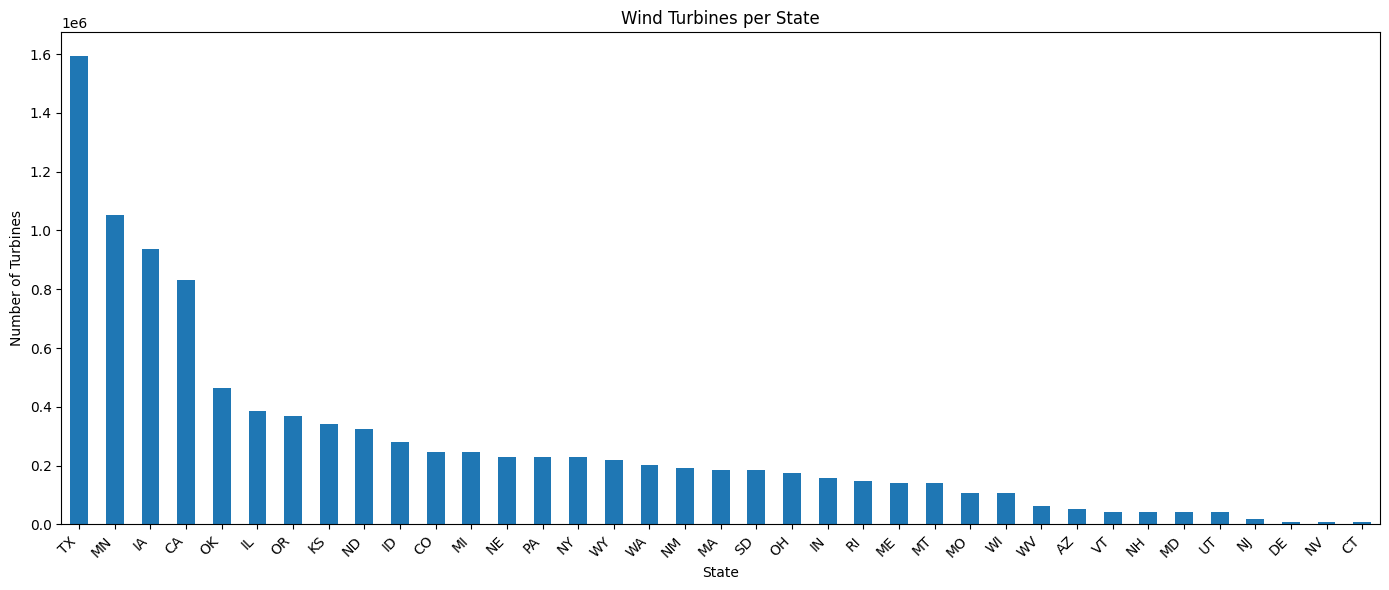

In [8]:
# Visualize state distribution
plt.figure(figsize=(14, 6))
state_counts.plot(kind='bar')
plt.title('Wind Turbines per State')
plt.xlabel('State')
plt.ylabel('Number of Turbines')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../outputs/state_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# Counties per state
counties_per_state = df.groupby('t_state')['t_county'].nunique().sort_values(ascending=False)
print("Counties per state:")
print(counties_per_state)

Counties per state:
t_state
TX    74
IA    48
MN    26
KS    25
OK    23
ND    22
IL    21
NE    19
SD    14
CA    14
PA    12
CO    12
NY    11
OH    11
WI    10
MT    10
NM    10
WA    10
MA     9
ME     9
MI     9
MO     6
IN     6
WY     6
OR     5
WV     5
UT     5
ID     5
AZ     4
VT     4
RI     4
NH     4
NJ     2
DE     1
CT     1
MD     1
NV     1
Name: t_county, dtype: int64


## Worker Distribution Strategy

In [11]:
def analyze_worker_distribution(df, num_workers):
    print(f"\n{'='*60}")
    print(f"ANALYSIS FOR {num_workers} WORKERS")
    print(f"{'='*60}\n")
    
    # Strategy 1: One state per worker (if we have enough states)
    num_states = df['t_state'].nunique()
    
    if num_workers <= num_states:
        print(f"Strategy 1: One or more states per worker")
        print(f"  - We have {num_states} states for {num_workers} workers")
        
        # Sort states by sample count for balanced distribution
        state_counts = df['t_state'].value_counts().sort_values(ascending=False)
        
        # Try to balance workload
        workers_assignment = [[] for _ in range(num_workers)]
        workers_counts = [0] * num_workers
        
        for state, count in state_counts.items():
            # Assign to worker with least samples (greedy balancing)
            min_worker = workers_counts.index(min(workers_counts))
            workers_assignment[min_worker].append(state)
            workers_counts[min_worker] += count
        
        print(f"\n  Balanced assignment:")
        for i, (states, count) in enumerate(zip(workers_assignment, workers_counts)):
            print(f"    Worker {i}: {len(states)} states, {count:,} samples")
            print(f"      States: {states}")
        
        # load balance metrics
        avg_samples = np.mean(workers_counts)
        std_samples = np.std(workers_counts)
        cv = (std_samples / avg_samples) * 100  # Coefficient of variation
        
        print(f"\n  Load Balance Metrics:")
        print(f"    Average samples per worker: {avg_samples:,.0f}")
        print(f"    Std deviation: {std_samples:,.0f}")
        print(f"    Coefficient of variation: {cv:.2f}%")
        print(f"    Min samples: {min(workers_counts):,}")
        print(f"    Max samples: {max(workers_counts):,}")
        print(f"    Imbalance ratio: {max(workers_counts)/min(workers_counts):.2f}x")
        
        return workers_assignment, workers_counts
    else:
        print(f"Strategy 1 not viable: Need {num_workers} workers but only {num_states} states")
        print(f"  Consider using fewer workers or splitting by county")
        return None, None

In [12]:
for num_workers in [5, 10, 15, 20]:
    workers_assignment, workers_counts = analyze_worker_distribution(df, num_workers)


ANALYSIS FOR 5 WORKERS

Strategy 1: One or more states per worker
  - We have 37 states for 5 workers

  Balanced assignment:
    Worker 0: 5 states, 2,014,800 samples
      States: ['TX', 'MA', 'ME', 'AZ', 'UT']
    Worker 1: 7 states, 2,006,040 samples
      States: ['MN', 'ID', 'PA', 'NM', 'RI', 'WV', 'MD']
    Worker 2: 8 states, 2,006,040 samples
      States: ['IA', 'ND', 'NE', 'WA', 'IN', 'MO', 'VT', 'DE']
    Worker 3: 8 states, 2,006,040 samples
      States: ['CA', 'OR', 'MI', 'WY', 'SD', 'WI', 'NH', 'NV']
    Worker 4: 9 states, 2,006,040 samples
      States: ['OK', 'IL', 'KS', 'CO', 'NY', 'OH', 'MT', 'NJ', 'CT']

  Load Balance Metrics:
    Average samples per worker: 2,007,792
    Std deviation: 3,504
    Coefficient of variation: 0.17%
    Min samples: 2,006,040
    Max samples: 2,014,800
    Imbalance ratio: 1.00x

ANALYSIS FOR 10 WORKERS

Strategy 1: One or more states per worker
  - We have 37 states for 10 workers

  Balanced assignment:
    Worker 0: 1 states, 1,59

## ID Mappings for Model

In [13]:
states_sorted = sorted(df['t_state'].unique())
state_to_id = {state: idx for idx, state in enumerate(states_sorted)}
id_to_state = {idx: state for state, idx in state_to_id.items()}

print("State to ID mapping:")
for state, idx in state_to_id.items():
    count = len(df[df['t_state'] == state])
    print(f"  {state:20s} -> ID {idx:3d}  ({count:6,} samples)")

State to ID mapping:
  AZ                   -> ID   0  (52,560 samples)
  CA                   -> ID   1  (832,200 samples)
  CO                   -> ID   2  (245,280 samples)
  CT                   -> ID   3  ( 8,760 samples)
  DE                   -> ID   4  ( 8,760 samples)
  IA                   -> ID   5  (937,320 samples)
  ID                   -> ID   6  (280,320 samples)
  IL                   -> ID   7  (385,440 samples)
  IN                   -> ID   8  (157,680 samples)
  KS                   -> ID   9  (341,640 samples)
  MA                   -> ID  10  (183,960 samples)
  MD                   -> ID  11  (43,800 samples)
  ME                   -> ID  12  (140,160 samples)
  MI                   -> ID  13  (245,280 samples)
  MN                   -> ID  14  (1,051,200 samples)
  MO                   -> ID  15  (105,120 samples)
  MT                   -> ID  16  (140,160 samples)
  ND                   -> ID  17  (324,120 samples)
  NE                   -> ID  18  (227,760 sa

In [14]:
# Create county to ID mapping
counties_sorted = sorted(df['t_county'].unique())
county_to_id = {county: idx for idx, county in enumerate(counties_sorted)}
id_to_county = {idx: county for county, idx in county_to_id.items()}

print(f"\nTotal counties: {len(county_to_id)}")
print("\nFirst 20 counties in mapping:")
for i, (county, idx) in enumerate(list(county_to_id.items())[:20]):
    print(f"  {county:30s} -> ID {idx:4d}")


Total counties: 395

First 20 counties in mapping:
  Adair County                   -> ID    0
  Adams County                   -> ID    1
  Alameda County                 -> ID    2
  Albany County                  -> ID    3
  Allen County                   -> ID    4
  Andrews County                 -> ID    5
  Antelope County                -> ID    6
  Archer County                  -> ID    7
  Aroostook County               -> ID    8
  Atchison County                -> ID    9
  Atlantic County                -> ID   10
  Audubon County                 -> ID   11
  Aurora County                  -> ID   12
  Bailey County                  -> ID   13
  Baker County                   -> ID   14
  Barber County                  -> ID   15
  Barbour County                 -> ID   16
  Barnes County                  -> ID   17
  Barnstable County              -> ID   18
  Barton County                  -> ID   19


## Some feature analysis

In [15]:
print("Feature Analysis for Model Design\n")

# Analyze spatial features (xlong, ylat)
print("Spatial Features:")
print(f"  Longitude (xlong):")
print(f"    Range: [{df['xlong'].min():.4f}, {df['xlong'].max():.4f}]")
print(f"    Mean: {df['xlong'].mean():.4f}, Std: {df['xlong'].std():.4f}")

print(f"  Latitude (ylat):")
print(f"    Range: [{df['ylat'].min():.4f}, {df['ylat'].max():.4f}]")
print(f"    Mean: {df['ylat'].mean():.4f}, Std: {df['ylat'].std():.4f}")

Feature Analysis for Model Design

Spatial Features:
  Longitude (xlong):
    Range: [-124.0647, -67.8110]
    Mean: -98.0440, Std: 12.7322
  Latitude (ylat):
    Range: [26.1129, 48.9969]
    Mean: 39.9825, Std: 4.8769


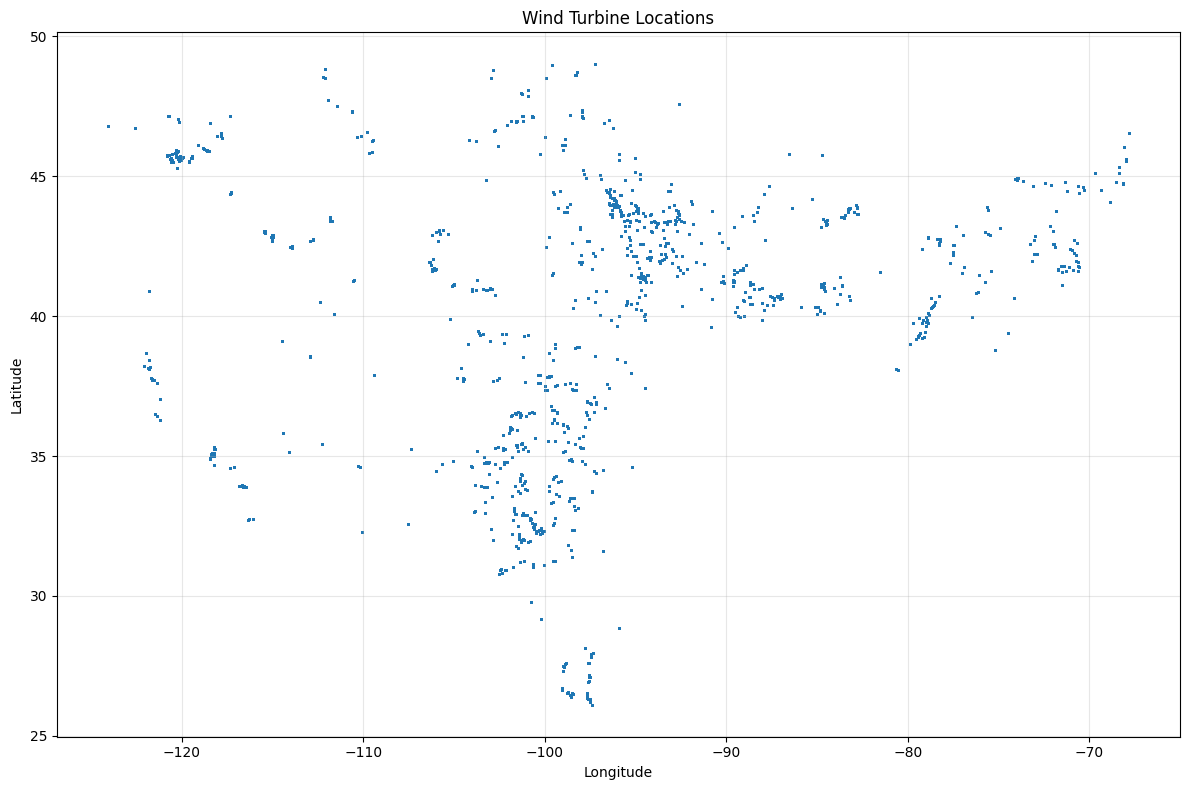

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(df['xlong'], df['ylat'], alpha=0.3, s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Wind Turbine Locations')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/turbine_locations.png', dpi=300, bbox_inches='tight')
plt.show()


Wind Speed Analysis:
  Range: [0.00, 30.96]
  Mean: 6.52, Std: 3.17
  Missing values: 0


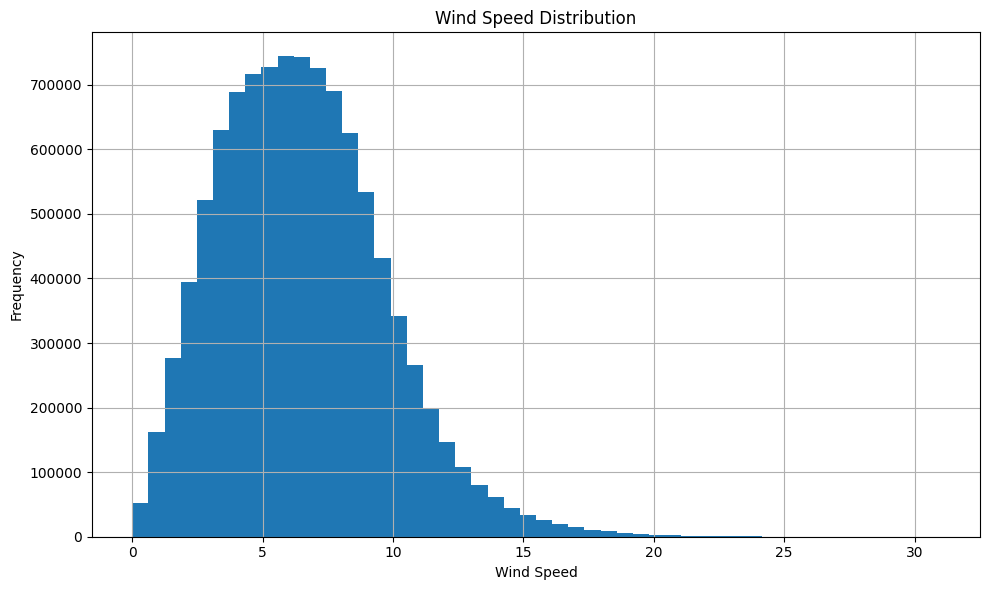

In [19]:
print("\nWind Speed Analysis:")
print(f"  Range: [{df['wind_speed'].min():.2f}, {df['wind_speed'].max():.2f}]")
print(f"  Mean: {df['wind_speed'].mean():.2f}, Std: {df['wind_speed'].std():.2f}")
print(f"  Missing values: {df['wind_speed'].isnull().sum()}")

plt.figure(figsize=(10, 6))
df['wind_speed'].hist(bins=50)
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.savefig('../outputs/wind_speed_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


Target Variable (capacity_factor):
  Range: [0.0000, 1.0000]
  Mean: 0.3104, Std: 0.3244
  Missing values: 0


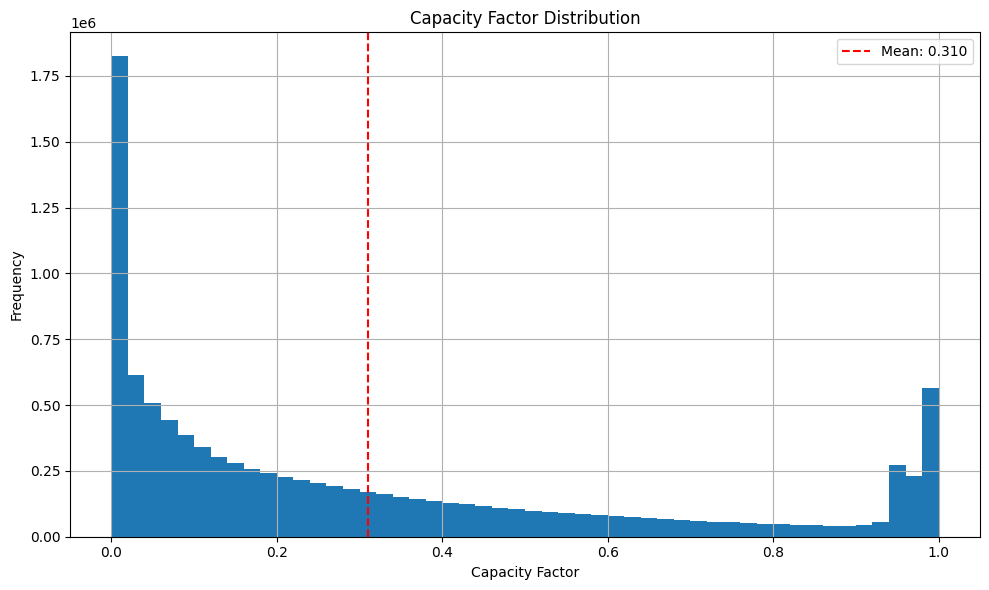

In [21]:
print("\nTarget Variable (capacity_factor):")
print(f"  Range: [{df['capacity_factor'].min():.4f}, {df['capacity_factor'].max():.4f}]")
print(f"  Mean: {df['capacity_factor'].mean():.4f}, Std: {df['capacity_factor'].std():.4f}")
print(f"  Missing values: {df['capacity_factor'].isnull().sum()}")

plt.figure(figsize=(10, 6))
df['capacity_factor'].hist(bins=50)
plt.xlabel('Capacity Factor')
plt.ylabel('Frequency')
plt.title('Capacity Factor Distribution')
plt.axvline(df['capacity_factor'].mean(), color='r', linestyle='--', label=f'Mean: {df["capacity_factor"].mean():.3f}')
plt.legend()
plt.tight_layout()
plt.savefig('../outputs/capacity_factor_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

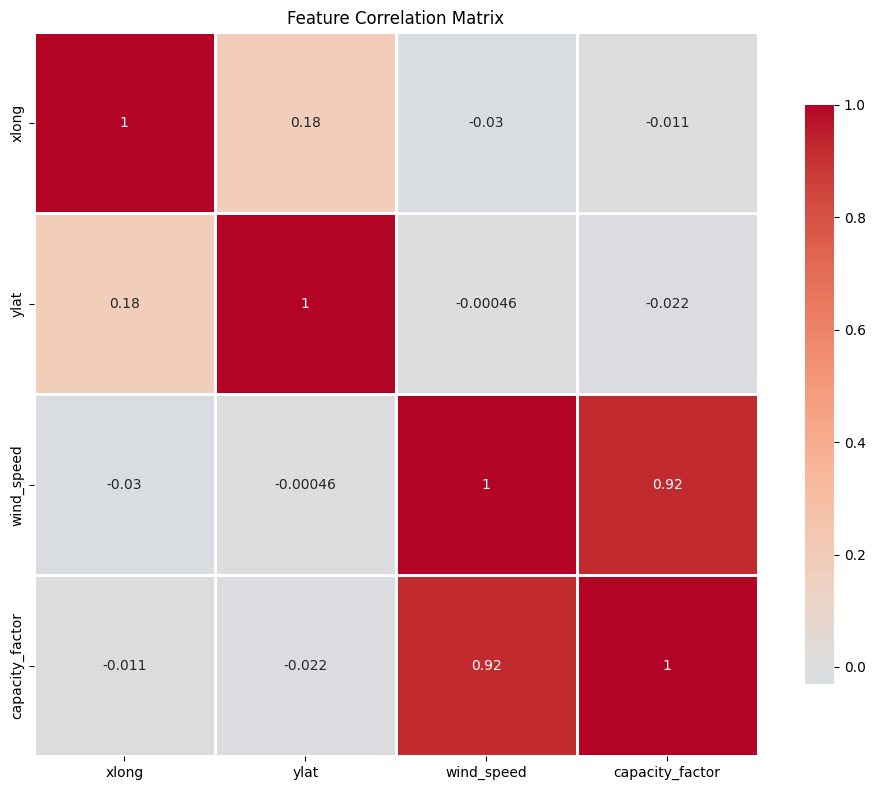

In [24]:
# Correlation analysis between numerical features
numerical_cols = ['xlong', 'ylat', 'wind_speed', 'capacity_factor']
if 'timestamp' in df.columns and pd.api.types.is_numeric_dtype(df['timestamp']):
    numerical_cols.append('timestamp')

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../outputs/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Save Metadata for Training

In [26]:
metadata = {
    'dataset_info': {
        'total_samples': int(len(df)),
        'num_states': int(num_states),
        'num_counties': int(len(df['t_county'].unique())),
        'features': list(df.columns)
    },
    'state_to_id': state_to_id,
    'id_to_state': id_to_state,
    'county_to_id': county_to_id,
    'id_to_county': id_to_county,
    'feature_stats': {
        'xlong': {
            'min': float(df['xlong'].min()),
            'max': float(df['xlong'].max()),
            'mean': float(df['xlong'].mean()),
            'std': float(df['xlong'].std())
        },
        'ylat': {
            'min': float(df['ylat'].min()),
            'max': float(df['ylat'].max()),
            'mean': float(df['ylat'].mean()),
            'std': float(df['ylat'].std())
        },
        'wind_speed': {
            'min': float(df['wind_speed'].min()),
            'max': float(df['wind_speed'].max()),
            'mean': float(df['wind_speed'].mean()),
            'std': float(df['wind_speed'].std())
        },
        'capacity_factor': {
            'min': float(df['capacity_factor'].min()),
            'max': float(df['capacity_factor'].max()),
            'mean': float(df['capacity_factor'].mean()),
            'std': float(df['capacity_factor'].std())
        }
    }
}

# Save metadata
with open('../config/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print("Metadata saved to config/metadata.json")

Metadata saved to config/metadata.json


In [27]:
# What is the optimal # of workers
def create_worker_assignment(df, num_workers):
    """Create balanced worker assignment and save to file"""
    state_counts = df['t_state'].value_counts().sort_values(ascending=False)
    
    workers_assignment = [[] for _ in range(num_workers)]
    workers_counts = [0] * num_workers
    
    for state, count in state_counts.items():
        min_worker = workers_counts.index(min(workers_counts))
        workers_assignment[min_worker].append(state)
        workers_counts[min_worker] += count
    
    assignment_dict = {
        'num_workers': num_workers,
        'workers': [
            {
                'rank': i,
                'states': states,
                'num_samples': count
            }
            for i, (states, count) in enumerate(zip(workers_assignment, workers_counts))
        ]
    }
    
    return assignment_dict

In [28]:
for num_workers in [5, 10, 15]:
    if num_workers <= num_states:
        assignment = create_worker_assignment(df, num_workers)
        
        filename = f'../config/worker_assignment_{num_workers}.json'
        with open(filename, 'w') as f:
            json.dump(assignment, f, indent=2)
        
        print(f"Worker assignment saved to {filename}")
        print(f"  Load balance: {max([w['num_samples'] for w in assignment['workers']]) / min([w['num_samples'] for w in assignment['workers']]):.2f}x imbalance\n")


Worker assignment saved to ../config/worker_assignment_5.json
  Load balance: 1.00x imbalance

Worker assignment saved to ../config/worker_assignment_10.json
  Load balance: 1.75x imbalance

Worker assignment saved to ../config/worker_assignment_15.json
  Load balance: 3.19x imbalance



## Data Quality Checks

In [29]:
# Check for any missing critical values
critical_columns = ['t_state', 't_county', 'xlong', 'ylat', 'wind_speed', 'capacity_factor']
print("Missing values in critical columns:")
for col in critical_columns:
    missing = df[col].isnull().sum()
    pct = (missing / len(df)) * 100
    print(f"  {col:20s}: {missing:6d} ({pct:.2f}%)")

Missing values in critical columns:
  t_state             :      0 (0.00%)
  t_county            :      0 (0.00%)
  xlong               :      0 (0.00%)
  ylat                :      0 (0.00%)
  wind_speed          :      0 (0.00%)
  capacity_factor     :      0 (0.00%)


In [30]:
# Check for outliers in capacity factor (should be 0-1)
invalid_cf = df[(df['capacity_factor'] < 0) | (df['capacity_factor'] > 1)]
print(f"\nInvalid capacity factors (outside [0,1]): {len(invalid_cf)}")

if len(invalid_cf) > 0:
    print("Sample invalid values:")
    print(invalid_cf[['t_state', 'capacity_factor']].head())


Invalid capacity factors (outside [0,1]): 0


In [31]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Duplicate rows: 0
